<a href="https://colab.research.google.com/github/tuntunwinkic/Face_with-Pi/blob/master/ctl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'mlworkshop/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
folder = 'cat'
file = 'cat.csv'

In [0]:
folder = 'tiger'
file = 'tiger.csv'

In [0]:
folder = 'lion'
file = 'lion.csv'

In [0]:
path = Path(base_dir + 'data/animal')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
print(path)
print(path/file)
print(dest)

/content/gdrive/My Drive/mlworkshop/data/animal
/content/gdrive/My Drive/mlworkshop/data/animal/tiger.csv
/content/gdrive/My Drive/mlworkshop/data/animal/tiger


In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/mlworkshop/data/animal/cat'),
 PosixPath('/content/gdrive/My Drive/mlworkshop/data/animal/cat.csv')]

In [14]:
download_images(path/file, dest, max_pics=200)


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
classes = ['cat','tiger','lion']


In [16]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cat


tiger


lion


In [0]:

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes


['cat', 'lion', 'tiger']

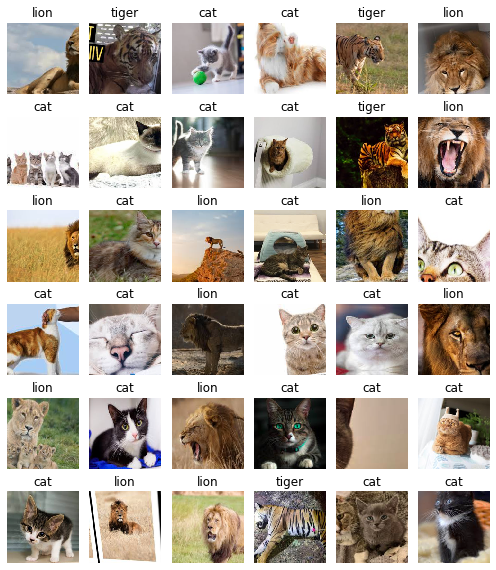

In [18]:
data.show_batch(rows=6, figsize=(7,8))


In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['cat', 'lion', 'tiger'], 3, 320, 80)

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 22.0MB/s]


In [21]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.248842,0.061329,0.025000,00:05
1,0.691841,0.112648,0.037500,00:04
2,0.478361,0.114000,0.037500,00:04
3,0.356109,0.110418,0.050000,00:04


In [0]:
learn.save('stage-1')


In [0]:
learn.unfreeze()

In [26]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


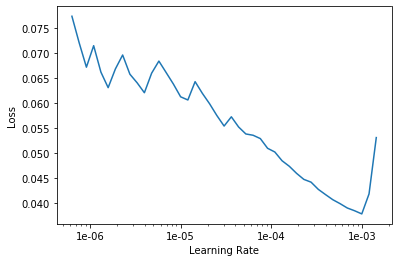

In [27]:
learn.recorder.plot()


In [30]:
learn.fit_one_cycle(2, max_lr=slice(5e-5,1e-3))



epoch,train_loss,valid_loss,error_rate,time
0,0.073879,0.290576,0.037500,00:05
1,0.057728,0.291756,0.037500,00:05


In [0]:
learn.save('stage-2')


In [0]:
learn.load('stage-2');


In [34]:
interp = ClassificationInterpretation.from_learner(learn)


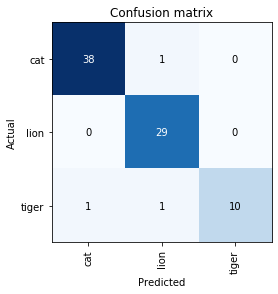

In [35]:
interp.plot_confusion_matrix()


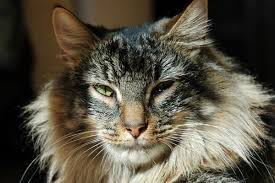

In [37]:
img = open_image(path/'cat'/'00000023.jpg')
img

In [38]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category cat